# Twitter iCard Object

With Twitter Cards, you can attach rich photos, videos and media experiences to Tweets, helping to drive traffic to your website. Simply add a few lines of markup to your webpage, and users who Tweet links to your content will have a “Card” added to the Tweet that’s visible to their followers.

- Twitter Card content:
    - title (headline)
    - text (intro paragraph)
    - url
        - domain
        - top level domain
    - image
        - hash

In [1]:
import psycopg2
import pandas as pd
from config import config
from matplotlib import pylab as plt

%matplotlib inline

In [2]:
conn = None
try:
    # read connection parameters
    params = config()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**params)

    # create a cursor
    cur = conn.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    cur.execute('SELECT version()')

    # display the PostgreSQL database server version
    db_version = cur.fetchone()
    print(db_version)

    # close the communication with the PostgreSQL
    cur.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.0, 64-bit',)


In [3]:
icards = pd.read_sql_query("SELECT * FROM tweets_icards WHERE is_processed is true;", conn )
print("Number of Tweets: %s" %len(icards))

Number of Tweets: 221473


In [4]:
icards.head()

,tweet_id,url,title,text,domain,top_level_domain,response_code,img,hash,path,has_icard,is_processed
0,951624621106675712,None,None,None,None,None,NaN,None,None,None,False,True
1,951417448724619264,None,None,None,None,None,NaN,None,None,None,False,True
2,951624658880692224,None,None,None,None,None,NaN,None,None,None,False,True
3,951624692405821441,None,None,None,None,None,NaN,None,None,None,False,True
4,951436522695397376,None,None,None,None,None,NaN,None,None,None,False,True


Tweets with iCards:	17.52% - 38806


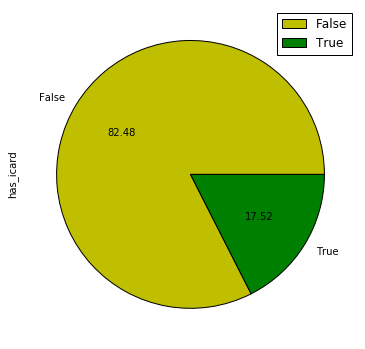

In [5]:
tweets_w_icards = icards[icards['has_icard'] == True]
tweets_w_no_icards = icards[icards['has_icard'] == False]

print("Tweets with iCards:\t%0.2f%% - %s" %((len(tweets_w_icards)/len(icards)*100), len(tweets_w_icards) ))

icards_pie = icards['has_icard']

icards_pie_value_count = icards_pie.value_counts()
icards_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

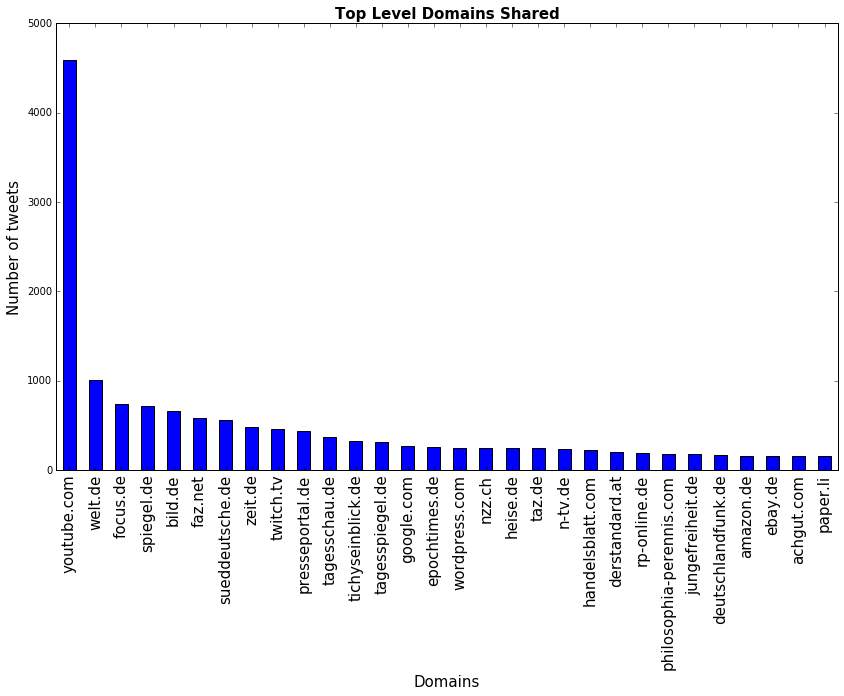

In [6]:
icard_domain = icards['top_level_domain'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Level Domains Shared', fontsize=15, fontweight='bold')
icard_domain[0:30].plot( kind='bar', color='blue', figsize=(14,8))

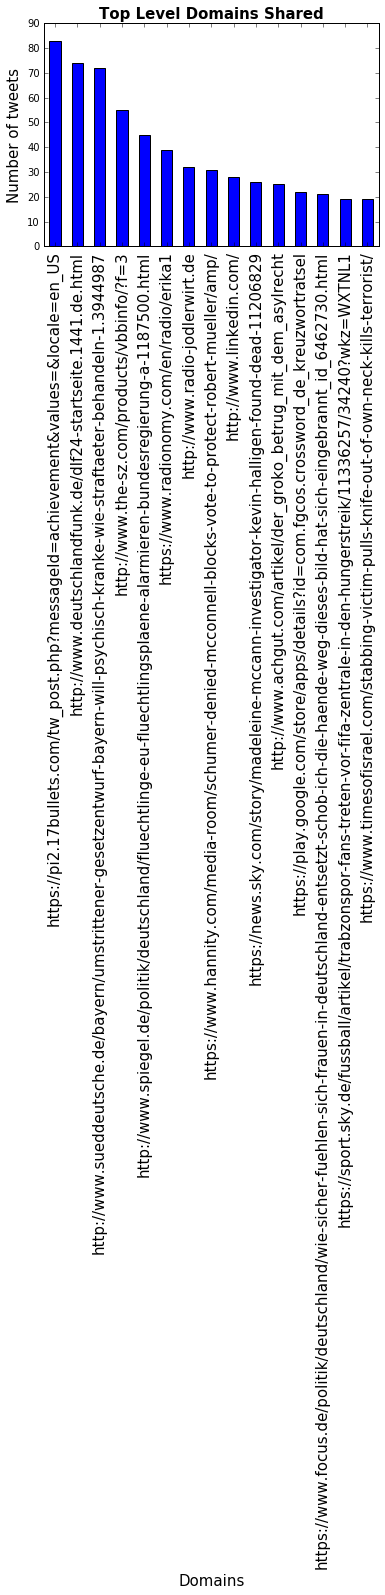

In [7]:
icard_url = icards['url'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Level Domains Shared', fontsize=15, fontweight='bold')
icard_url[0:15].plot( kind='bar', color='blue')

In [8]:
icard_url[:20]

https://pi2.17bullets.com/tw_post.php?messageId=achievement&values=&locale=en_US                                                                                                            83
http://www.deutschlandfunk.de/dlf24-startseite.1441.de.html                                                                                                                                 74
http://www.sueddeutsche.de/bayern/umstrittener-gesetzentwurf-bayern-will-psychisch-kranke-wie-straftaeter-behandeln-1.3944987                                                               72
http://www.the-sz.com/products/vbbinfo/?f=3                                                                                                                                                 55
http://www.spiegel.de/politik/deutschland/fluechtlinge-eu-fluechtlingsplaene-alarmieren-bundesregierung-a-1187500.html                                                                      45
https://www.radionomy.com/en/radio/erika1    

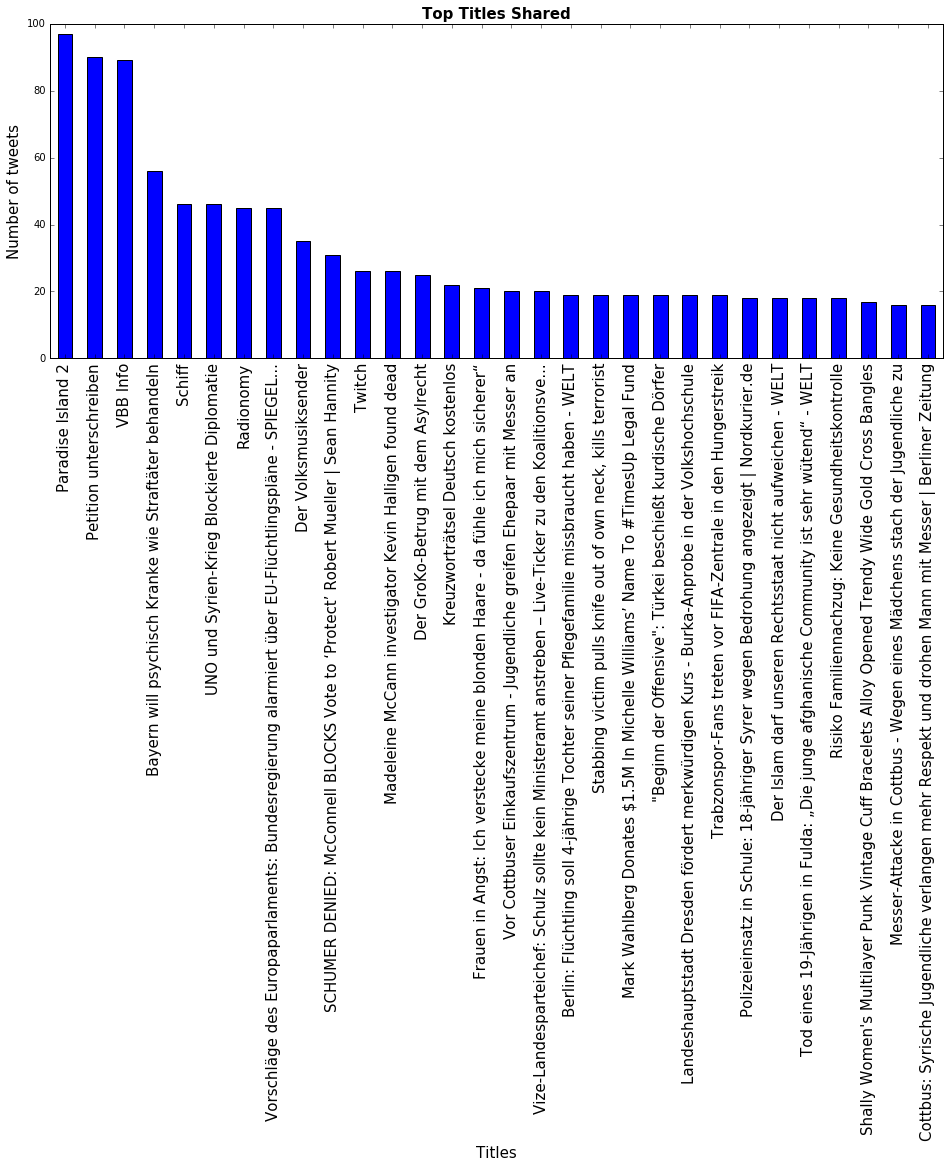

In [9]:
icard_url = icards['title'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Titles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Titles Shared', fontsize=15, fontweight='bold')
icard_url[0:30].plot( kind='bar', color='blue', figsize=(16, 6))

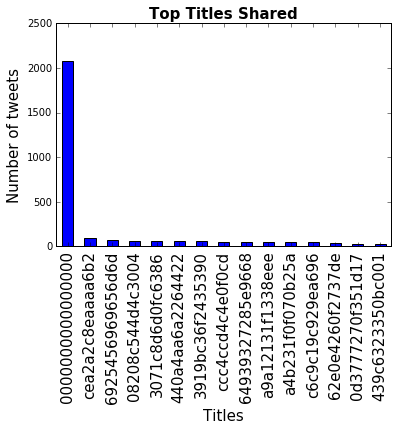

In [10]:
icard_hash = icards['hash'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Titles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Titles Shared', fontsize=15, fontweight='bold')
icard_hash[0:15].plot( kind='bar', color='blue')

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import display, Image, SVG, Math, YouTubeVideo
import urllib.request

%matplotlib inline



icards_imgs = icards['path'].value_counts()
for a, b in icards_imgs[0:10].iteritems():
    #pil_im = Image.open(icards['img'][icards['path'] == a], 'r')
    #imshow(np.asarray(pil_im))
    try:
        print(icards['img'][icards['path'] == a].iloc[0])
        print(icards['tweet_id'][icards['path'] == a].iloc[0])
        print(b)
        #display(Image(icards['img'][icards['path'] == a].iloc[0]))
    except:
        pass

https://pbs.twimg.com/cards/player-placeholder.png
951786105258631168
1762
https://pbs.twimg.com/card_img/981443131072765953/aeo3XiXe?format=jpg&name=144x144_2
951557129646825472
311
https://pbs.twimg.com/card_img/983982357626654720/l83-Xv8B?format=png&name=144x144_2
951677557426008065
97
https://pbs.twimg.com/card_img/982004780091498496/bjkz8kTM?format=jpg&name=386x202
951364322139176960
72
https://pbs.twimg.com/card_img/982173222237036544/B2C1UORw?format=jpg&name=600x314
952830886181003265
66
https://pbs.twimg.com/card_img/982024414861709314/b7XM9xJ9?format=jpg&name=144x144_2
951748843808452610
66
https://pbs.twimg.com/card_img/983452237275062272/5E3JXwd2?format=jpg&name=144x144_2
951697698482204672
57
https://pbs.twimg.com/card_img/988336275647328256/aTqP9Az0?format=jpg&name=600x314
985803158466199552
56
https://pbs.twimg.com/card_img/981276585801277440/J4_NOmFI?format=png&name=144x144_2
951824886535720960
55
https://pbs.twimg.com/card_img/968612305637400576/bN4Hs6bM?format=jpg&name